# Final Project

## Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.dates as mdates
from datetime import datetime
sns.set()

import sqlite3

import sys
sys.path.append(r'C:\Users\azuka\Documents\Python Scripts\common_functions')
from common_functions import check_values

In [203]:
sns.set_context('talk')

## Connect ke database

In [3]:
cnxn = sqlite3.connect(r'C:\Users\azuka\Documents\Materials\Non Degree\04 SQL\Dataset\Final Project\olist.db')

## Cek table di database

In [4]:
pd.read_sql('''
                 SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND name NOT LIKE 'sqlite_%';
                 ''',cnxn)

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


## Preview data

In [5]:
check_values(pd.read_sql('''
            select * from olist_order_dataset
            --limit 1000
            ''',cnxn))

,features,data_type,nan_total,nan_pct,unique,values_ex
0,index,int64,0,0.00,99441,"[96523, 11550]"
1,order_id,object,0,0.00,99441,"[ae20f5a9812b11c76007a2c389285486, 3bee0a6bb3f..."
2,customer_id,object,0,0.00,99441,"[cee7f6079c308086d66b155a3ef25e72, e51e265631a..."
3,order_status,object,0,0.00,8,"[invoiced, processing]"
4,order_purchase_timestamp,object,0,0.00,98875,"[2018-01-19 13:08:32, 2018-08-16 11:54:27]"
5,order_approved_at,object,160,0.16,90733,"[2017-04-08 22:35:09, 2018-08-14 17:55:16]"
6,order_delivered_carrier_date,object,1783,1.79,81018,"[2018-03-19 18:05:50, 2018-01-02 15:53:07]"
7,order_delivered_customer_date,object,2965,2.98,95664,"[2017-10-02 18:54:27, 2017-07-27 13:34:24]"
8,order_estimated_delivery_date,object,0,0.00,459,"[2018-10-30 00:00:00, 2018-03-28 00:00:00]"


In [6]:
pd.read_sql('''
            select * from olist_order_dataset
            limit 5
            ''',cnxn)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
check_values(pd.read_sql('''
            select * from olist_products_dataset
            ''',cnxn))

,features,data_type,nan_total,nan_pct,unique,values_ex
0,index,int64,0,0.00,32951,"[11488, 2802]"
1,product_id,object,0,0.00,32951,"[7559a915036030709d3491e1602099a7, 0554df77f3e..."
2,product_category_name,object,610,1.85,73,"[agro_industria_e_comercio, moveis_escritorio]"
3,product_name_lenght,float64,610,1.85,66,"[68.0, 47.0]"
4,product_description_lenght,float64,610,1.85,2960,"[1910.0, 3752.0]"
5,product_photos_qty,float64,610,1.85,19,"[18.0, nan]"
6,product_weight_g,float64,2,0.01,2204,"[11017.0, 866.0]"
7,product_length_cm,float64,2,0.01,99,"[15.0, 97.0]"
8,product_height_cm,float64,2,0.01,102,"[28.0, 93.0]"
9,product_width_cm,float64,2,0.01,95,"[nan, 45.0]"


In [8]:
check_values(pd.read_sql('''
            select * from olist_order_items_dataset
            ''',cnxn))

,features,data_type,nan_total,nan_pct,unique,values_ex
0,index,int64,0,0.0,112650,"[108962, 57361]"
1,order_id,object,0,0.0,98666,"[76098ff18bad7555c2d85340e82b8941, a5dc44fe023..."
2,order_item_id,int64,0,0.0,21,"[13, 6]"
3,product_id,object,0,0.0,32951,"[230aa1590e1e7bc88252d8f1649109c2, f6f1acecb87..."
4,seller_id,object,0,0.0,3095,"[269c5fc9fcadee614364c3620c30a1f9, 3dfd3dc96f7..."
5,shipping_limit_date,object,0,0.0,93318,"[2018-06-06 09:30:51, 2017-07-19 06:45:10]"
6,price,float64,0,0.0,5968,"[231.27, 142.42]"
7,freight_value,float64,0,0.0,6999,"[62.33, 53.89]"


In [9]:
check_values(pd.read_sql('''
            select * from olist_order_customer_dataset
            --limit 1000
            ''',cnxn))

,features,data_type,nan_total,nan_pct,unique,values_ex
0,index,int64,0,0.0,99441,"[51679, 21987]"
1,customer_id,object,0,0.0,99441,"[a79a5a422868c5d292c0e0a4af915e7b, 7fef0997cc9..."
2,customer_unique_id,object,0,0.0,96096,"[9ec824178fb2d445242b04f97873a0b9, 39904c3df11..."
3,customer_zip_code_prefix,int64,0,0.0,14994,"[2859, 39180]"
4,customer_city,object,0,0.0,4119,"[nova russas, quinta do sol]"
5,customer_state,object,0,0.0,27,"[AL, PE]"


In [10]:
check_values(pd.read_sql('''
            select * from olist_sellers_dataset
            --limit 1000
            ''',cnxn))

,features,data_type,nan_total,nan_pct,unique,values_ex
0,index,int64,0,0.0,3095,"[288, 2343]"
1,seller_id,object,0,0.0,3095,"[eb72802c83dc7547529c9546d1a9b8ef, 70ee6941991..."
2,seller_zip_code_prefix,int64,0,0.0,2246,"[7400, 37650]"
3,seller_city,object,0,0.0,611,"[cariacica / es, auriflama]"
4,seller_state,object,0,0.0,23,"[SC, RS]"


Secara keseluruhan, terdapat 1.89% produk yang dipesan yang tidak memiliki informasi kategori dalam Bahasa Inggris.

In [11]:
pd.read_sql('''
            select 
            count(distinct order_id) as total_order, count(distinct case when c.product_category_name is null then order_id end) as total_order_null_prod,
            round(cast(count(distinct case when c.product_category_name is null then order_id end) as float) / cast(count(distinct order_id) as float) * 100, 2) as pct_null_order,
            count(distinct oi.product_id) as total_product, count(distinct case when c.product_category_name is null then oi.product_id end) as total_product_null,
            round( cast(count(distinct case when c.product_category_name is null then oi.product_id end) as float) / cast(count(distinct oi.product_id) as float) * 100, 2 ) as pct_null_product
            from olist_order_items_dataset oi
            left join olist_products_dataset p 
                on oi.product_id = p.product_id
            left join product_category_name_translation c
                on p.product_category_name = c.product_category_name
            -- where c.product_category_name is null
            -- limit 10
            ''',cnxn)

,total_order,total_order_null_prod,pct_null_order,total_product,total_product_null,pct_null_product
0,98666,1473,1.49,32951,623,1.89


Hanya ambil data order berstatus `shipped` atau `delivered`

In [12]:
df_sales = pd.read_sql('''
            select 
            o.*, cat.product_category_name_english, p.product_category_name, 
            oi.product_id, oi.price,
            cus.customer_zip_code_prefix AS destination_zip_code, cus.customer_city AS destination_city, cus.customer_state AS destination_state, sel.seller_zip_code_prefix AS source_zip_code, sel.seller_city AS source_city, sel.seller_state AS source_state
            from olist_order_dataset o
            left join olist_order_items_dataset oi
                on o.order_id = oi.order_id
            left join olist_products_dataset p 
                on oi.product_id = p.product_id
            left join product_category_name_translation cat
                on p.product_category_name = cat.product_category_name
            left join olist_order_customer_dataset cus
                on o.customer_id = cus.customer_id
            left join olist_sellers_dataset sel
                on oi.seller_id = sel.seller_id
            where o.order_status  in ('shipped','delivered')
            ''',cnxn)

df_sales.shape

(111383, 19)

## Data Cleaning

### Missing data

1. Terdapat 1.42% data produk yang tidak memiliki kategori dalam Bahasa Inggris
2. Terdapat 1 dari 111 ribu baris data yang detail produknya tidak ditemukan karena `order_id` nya tidak ditemukan di tabel order item -> abaikan

In [13]:
check_values(df_sales)

,features,data_type,nan_total,nan_pct,unique,values_ex
0,index,int64,0,0.00,97585,"[62142, 86440]"
1,order_id,object,0,0.00,97585,"[f5bbdd05dbb39401798ee5b4aabe5532, 5d8ba2d5043..."
2,customer_id,object,0,0.00,97585,"[962b41ee521809e7435fdac0d93063a9, e6be74a3563..."
3,order_status,object,0,0.00,2,"[delivered, shipped]"
4,order_purchase_timestamp,object,0,0.00,97041,"[2017-10-06 01:07:15, 2018-03-15 00:19:52]"
5,order_approved_at,object,15,0.01,89221,"[2017-12-27 17:48:15, 2018-01-19 17:18:24]"
6,order_delivered_carrier_date,object,2,0.00,80951,"[2018-04-23 19:11:08, 2017-08-08 18:32:19]"
7,order_delivered_customer_date,object,1194,1.07,95658,"[2018-04-18 21:06:40, 2017-08-10 19:35:37]"
8,order_estimated_delivery_date,object,0,0.00,446,"[2018-07-19 00:00:00, 2017-06-29 00:00:00]"
9,product_category_name_english,object,1587,1.42,71,"[agro_industry_and_commerce, fashion_shoes]"


### Cek persebaran harga

In [14]:
df_sales[['product_id','price']].drop_duplicates().price.describe()

count    41810.000000
mean       145.307391
std        236.319253
min          0.850000
25%         40.000000
50%         81.250000
75%        158.000000
max       6735.000000
Name: price, dtype: float64

Untuk tiap `product_id`, harganya bisa berbeda-beda untuk order yang berbeda. Kita bisa ambil nilai unik dari harga dengan mengkombinasikan harga dengan `product_id`, sehingga 1 nilai unik dari harga adalah 1 kombinasi `product_id` dan `price`. Didapatkan bahwa nilai persentil ke-99 nya adalah 1150.

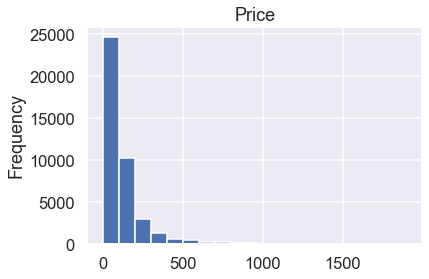

In [204]:
df_sales[['product_id','price']].dropna().drop_duplicates().price.plot.hist(bins=np.arange(0,2000,100))
plt.title('Price')
plt.savefig('price outlier.png', bbox_inches='tight')

In [16]:
np.percentile(df_sales[['product_id','price']].dropna().drop_duplicates().price, 99)

1149.9909999999995

Jika kita melihat Top 15 kategori produk mahal yaitu produk dengan harga di atas persentil ke-99, maka kategori produk yang termasuk produk mahal masih terlihat reasonable. 

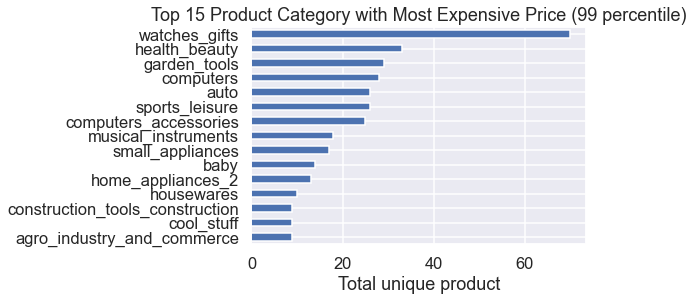

In [205]:
df_sales[df_sales.price>=np.percentile(df_sales[['product_id','price']].dropna().drop_duplicates().price, 99)][['product_category_name_english','product_id','price']].drop_duplicates().product_category_name_english.value_counts().sort_values().tail(15).plot.barh()
plt.title('Top 15 Product Category with Most Expensive Price (99 percentile)')
plt.xlabel('Total unique product')
plt.savefig('price outlier product category.png', bbox_inches='tight')
plt.show()

### Format kolom date

In [18]:
df_sales['order_purchase_timestamp'].apply(type).value_counts()

<class 'str'>    111383
Name: order_purchase_timestamp, dtype: int64

In [19]:
df_sales.order_purchase_timestamp.str.len().value_counts()

19    111383
Name: order_purchase_timestamp, dtype: int64

In [20]:
df_sales['order_purchase_timestamp'] = pd.to_datetime(df_sales['order_purchase_timestamp'])
df_sales.order_purchase_timestamp

0        2017-10-02 10:56:33
1        2018-07-24 20:41:37
2        2018-08-08 08:38:49
3        2017-11-18 19:28:06
4        2018-02-13 21:18:39
                 ...        
111378   2018-02-06 12:58:58
111379   2017-08-27 14:46:43
111380   2018-01-08 21:28:27
111381   2018-01-08 21:28:27
111382   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 111383, dtype: datetime64[ns]

# Analisis

## Produk yang paling banyak dibeli

Produk yang paling banyak dibeli adalah produk dengan `product_id = 'bb50f2e236e5eea0100680137654686c'`. Karena tidak ada info nama produk yang menggambarkan jenis produk, maka diambil keterangan kategori produk (`product_category_name_english`) untuk mendapatkan info jenis produk.

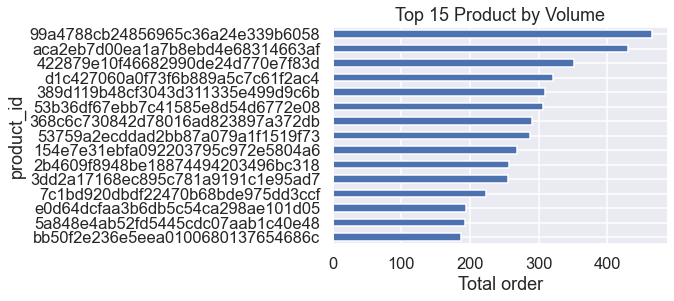

In [206]:
df_sales.groupby(['product_id'])['order_id'].nunique().sort_values().tail(15).plot.barh()
plt.title('Top 15 Product by Volume')
plt.xlabel('Total order')
plt.savefig('produk paling banyak dibeli by volume.png', bbox_inches='tight')
plt.show()

Produk dengan penjualan terbesar berasal dari kategori `bed_bath_table`. Produk top 15 lainnya banyak berasal dari kategori `garden_tools` dan `health_beauty`.

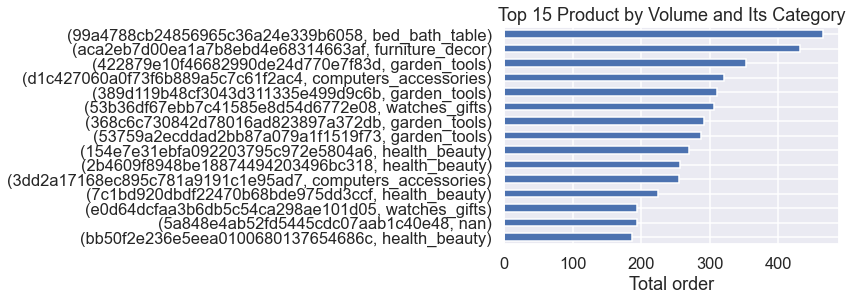

In [209]:
df_sales.groupby(['product_id','product_category_name_english'],dropna=False)['order_id'].nunique().sort_values().tail(15).plot.barh()
plt.title('Top 15 Product by Volume and Its Category')
plt.xlabel('Total order')
plt.ylabel('')
plt.savefig('produk paling banyak dibeli by volume dan kategorinya.png', bbox_inches='tight')
plt.show()

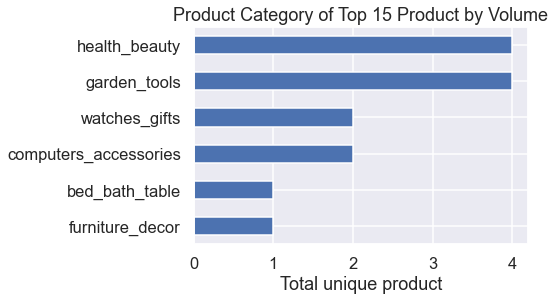

In [208]:
pd.Series([i[1] for i in df_sales.groupby(['product_id','product_category_name_english'],dropna=False)['order_id'].nunique().sort_values().tail(15).index]).value_counts().sort_values(ascending=True).plot.barh()
plt.title('Product Category of Top 15 Product by Volume')
plt.xlabel('Total unique product')
plt.savefig('kategori produk paling banyak dibeli by volume.png', bbox_inches='tight')
plt.show()

Walaupun demikian, dari top 15 produk berdasarkan volume penjualan hanya terdapat 7 produk yang ikut menyumbang top 15 sales. Produk dari kategori `health_beauty` menempati urutan pertama sebagai produk dengan penjualan tertinggi, namun produk dari kategori `watches_gifts` lebih banyak menjadi produk penyumbang top 15 penjualan.

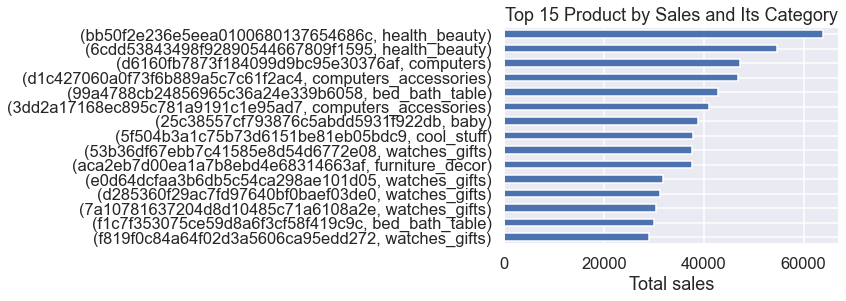

In [216]:
df_sales.groupby(['product_id','product_category_name_english'],dropna=False)['price'].sum().sort_values().tail(15).plot.barh()
plt.title('Top 15 Product by Sales and Its Category')
plt.xlabel('Total sales')
plt.savefig('produk paling banyak dibeli by sales dan kategorinya 2.png', bbox_inches='tight')
plt.ylabel('')
plt.show()

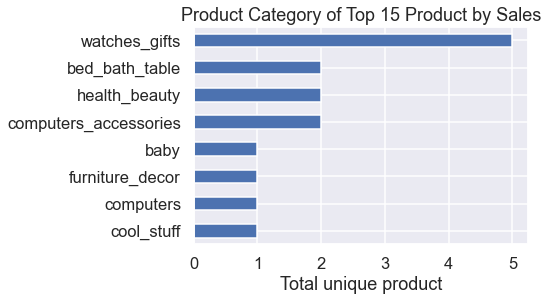

In [212]:
pd.Series([i[1] for i in df_sales.groupby(['product_id','product_category_name_english'],dropna=False)['price'].sum().sort_values().tail(15).index]).value_counts().sort_values(ascending=True).plot.barh()
plt.title('Product Category of Top 15 Product by Sales')
plt.xlabel('Total unique product')
plt.savefig('kategori produk paling banyak dibeli by sales.png', bbox_inches='tight')
plt.show()

In [184]:
len(set([i[0] for i in df_sales.groupby(['product_id','product_category_name_english'],dropna=False)['order_id'].nunique().sort_values().tail(15).index]) & set([i[0] for i in df_sales.groupby(['product_id','product_category_name_english'],dropna=False)['price'].sum().sort_values().tail(15).index]))

7

## Frekuensi order per customer

Dari dataset ini tampak bahwa tidak ada customer yang melakukan repeat order sama sekali (total order per customer > 1). Hal ini mungkin menunjukkan bahwa dataset yang diberikan bukanlah dataset keseluruhan, namun sampling dari dataset yang lebih besar. Kemungkinan lainnya, skema pembelian produk tidak mengharuskan customer untuk registrasi, sehingga setiap kali seorang customer melakukan pembelian akan tergenerate customer ID baru.

<AxesSubplot:ylabel='Frequency'>

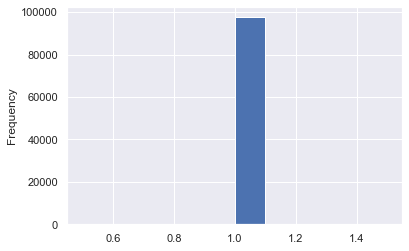

In [23]:
df_sales.groupby(['customer_id'], as_index=False)['order_id'].nunique().order_id.plot.hist()

In [24]:
df_sales.groupby(['customer_id'], as_index=False)['order_id'].nunique().order_id.describe()

count    97585.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: order_id, dtype: float64

## Jalur pengiriman paling banyak

Jalur pengiriman dapat dilihat dari nama kota asal paket dan nama kota tujuan. Walaupun demikian, sangat mungkin terdapat salah ketik atau perbedaan lainnya yang menyebabkan suatu kota tidak digolongkan sebagai satu kota yang sama. Contohnya data paket dengan zip code `13456` seakan memiliki 2 kota asal, `santa barbara d'oeste` dan `santa barbara d oeste`.

Selain itu, zip code yang ada di dataset ini hanya menampilkan bagian prefix-nya saja. [Brazil memiliki sistem zip code berupa prefix diikuti 3 angka](https://www.angloinfo.com/how-to/brazil/housing/postal-system), sehingga zip code yang ada di dataset ini bisa menuju dua kota yang berbeda karena kode akhiran 3 angkanya bisa berbeda.

In [25]:
df_sales['shipping_route_city'] = df_sales.source_city + '-' + df_sales.destination_city
df_sales['shipping_route_state'] = df_sales.source_state + '-' + df_sales.destination_state

In [26]:
df_sales[df_sales.source_zip_code==88075.0][['source_city']].drop_duplicates()

,source_city
7800,florianopolis
17562,sao jose


Pengiriman paling banyak dilakukan dari kota Sao Paulo ke kota Sao Paulo.

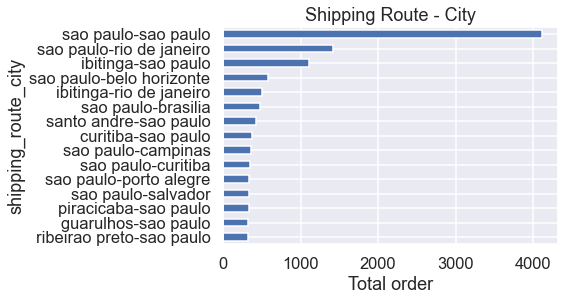

In [217]:
df_sales.groupby(['shipping_route_city'])['order_id'].nunique().sort_values().tail(15).plot.barh()
plt.title('Shipping Route - City')
plt.xlabel('Total order')
plt.savefig('rute pengiriman - kota.png', bbox_inches='tight')
plt.show()

Pengiriman paling banyak dilakukan antar daerah di negara bagian Sao Paulo, diikuti Sao Paulo ke Rio de Janeiro.

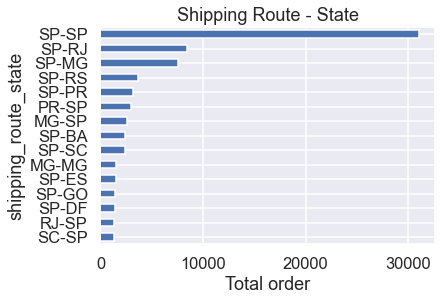

In [218]:
df_sales.groupby(['shipping_route_state'])['order_id'].nunique().sort_values().tail(15).plot.barh()
plt.title('Shipping Route - State')
plt.xlabel('Total order')
plt.savefig('rute pengiriman - state code.png', bbox_inches='tight')
plt.show()

Untuk mengetahui nama tiap-tiap negara bagian, gunakan dataset tambahan berisi info nama negara bagian berdasarkan kodenya.

In [29]:
df_state_br = pd.read_csv('https://raw.githubusercontent.com/datasets-br/state-codes/master/data/br-state-codes.csv')
df_state_br.head()

,subdivision,region,name_prefix,name,id,idIBGE,wdId,lexLabel,creation,extinction,...,utcOffset_DST,postalCode_ranges,km2,borders,centroid_geohash,utm_zones,bounds_geohash,bounds_lat,bounds_long,notes
0,AC,N,Estado do,Acre,1,12.0,Q40780,acre,1904,NaN,...,-5.0,[69900-000 69999-999],164124.0,AM,6qmgs6fgj,18S 19S,6q52s71b3 6w8xecq4d,-11.1455614673583 -7.11182437923207,-73.9904499689999 -66.6237537659999,NaN
1,AL,NE,Estado de,Alagoas,2,27.0,Q40885,alagoas,1889,NaN,...,-3.0,[57000-000 57999-999],27848.0,BA PE SE,7nmcys499,24S 25S,7nhu3bk4p 7nrjb5e5u,-10.5011858043386 -8.81312673328604,-38.237588925 -35.1519504509999,NaN
2,AM,N,Estado do,Amazonas,3,13.0,Q40040,amazonas,1889,NaN,...,-4.0,[69000-000 69299-999]; [69400-000 69899-999],1559148.0,AC MT PA RO RR,6x602gc00,19N 20N 21N 18S 19S 20S 21S,6q780seme db2hg2zp8,-9.81804587531735 2.24663056107414,-73.8015581149999 -56.0975580379999,NaN
3,AP,N,Estado do,Amapá,4,16.0,Q40130,amapa,1943,NaN,...,-3.0,[68900-000 68999-999],142829.0,PA,db701wybj,21N 22N 22S,6zbbzqbqf dbu91p9jz,-1.23617637404071 4.43674631714571,-54.8762501799999 -49.8762166349999,NaN
4,BA,NE,Estado da,Bahia,5,29.0,Q40430,bahia,1889,NaN,...,-3.0,[40000-000 48999-999],564733.0,AL ES GO MG PE PI SE TO,7jf348gyc,23S 24S,6uwze5wry 7nmrqq9h8,-18.3485602605644 -8.53282057127726,-46.617096757 -37.341146654,NaN


In [30]:
df_sales = pd.merge(pd.merge(df_sales,
         df_state_br[['subdivision','name']].rename(columns={'name':'source_state_name'}),
         left_on=['source_state'],
         right_on=['subdivision']),
         df_state_br[['subdivision','name']].rename(columns={'name':'destination_state_name'}),
         left_on=['destination_state'],
         right_on=['subdivision'])
df_sales

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,...,destination_state,source_zip_code,source_city,source_state,shipping_route_city,shipping_route_state,subdivision_x,source_state_name,subdivision_y,destination_state_name
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,housewares,...,SP,9350.0,maua,SP,maua-sao paulo,SP-SP,SP,São Paulo,SP,São Paulo
1,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,stationery,...,SP,8752.0,mogi das cruzes,SP,mogi das cruzes-santo andre,SP-SP,SP,São Paulo,SP,São Paulo
2,9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,office_furniture,...,SP,8577.0,itaquaquecetuba,SP,itaquaquecetuba-sorocaba,SP-SP,SP,São Paulo,SP,São Paulo
3,13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,bed_bath_table,...,SP,14940.0,ibitinga,SP,ibitinga-sao paulo,SP-SP,SP,São Paulo,SP,São Paulo
4,14,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,toys,...,SP,88301.0,itajai,SP,itajai-sao paulo,SP-SP,SP,São Paulo,SP,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111377,201,40001f4b6e1a35f0b99fc4f44078ab27,1690401c1e48c9526a79e72ba8c069a2,delivered,2017-12-09 17:27:58,2017-12-09 17:37:27,2017-12-12 17:17:24,2018-01-04 21:23:53,2018-02-01 00:00:00,telephony,...,AP,42738.0,lauro de freitas,BA,lauro de freitas-macapa,BA-AP,BA,Bahia,AP,Amapá
111378,64982,6b8a03d40f75b75ec65ed5ba13d80f95,72a4878a79935a45e5acec3b541af15a,delivered,2017-10-24 22:40:56,2017-10-24 22:56:26,2017-10-25 21:23:45,2017-11-09 18:17:20,2017-12-11 00:00:00,computers,...,AP,42738.0,lauro de freitas,BA,lauro de freitas-macapa,BA-AP,BA,Bahia,AP,Amapá
111379,19345,575fddcc90877446a5a777b509ac3786,6366405f9937312b89b389f96d2f82f8,delivered,2018-07-10 14:55:15,2018-07-10 15:10:12,2018-07-17 13:46:00,2018-08-07 21:46:50,2018-08-22 00:00:00,health_beauty,...,AP,65072.0,sao luis,MA,sao luis-macapa,MA-AP,MA,Maranhão,AP,Amapá
111380,42628,4b806b93edf76523f25669be3962bd2f,43553a559f05e8a6a4b306a55b2a1de3,delivered,2018-05-14 18:09:39,2018-05-15 18:35:28,2018-05-16 13:35:00,2018-06-13 18:52:00,2018-06-27 00:00:00,computers_accessories,...,AP,51250.0,recife,PE,recife-macapa,PE-AP,PE,Pernambuco,AP,Amapá


In [31]:
df_sales['shipping_route_state_name'] = df_sales.source_state_name + '-' + df_sales.destination_state_name

Terdapat 3 jalur pengiriman utama:
1. Sao Paulo -> Sao Paulo
2. Sao Paulo -> Rio de Janeiro
3. Sao Paulo -> Minas Gerais

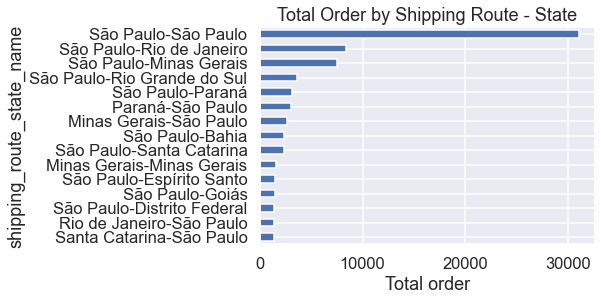

In [219]:
df_sales.groupby(['shipping_route_state_name'])['order_id'].nunique().sort_values().tail(15).plot.barh()
plt.title('Total Order by Shipping Route - State')
plt.xlabel('Total order')
plt.savefig('rute pengiriman - state name.png', bbox_inches='tight')
plt.show()

Tiga rute utama ini menyumbang sebanyak 48.16% total order.

In [33]:
round(df_sales[df_sales.shipping_route_state.isin(['SP-SP','SP-RJ','SP-MG'])].order_id.nunique() / df_sales.order_id.nunique()*100,2)

48.16

Berdasarkan total penjualan, tiga rute utama ini juga menjadi tiga rute teratas penyumbang total penjualan. Sebanyak 41.7% penjualan datang dari tiga rute ini.

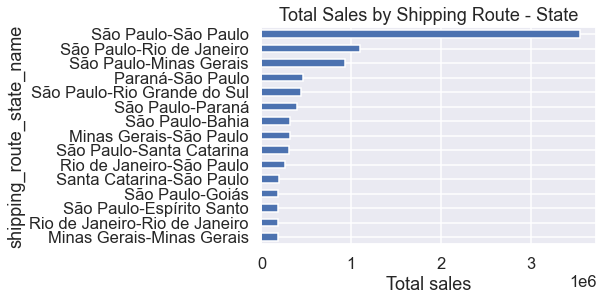

In [220]:
df_sales.groupby(['shipping_route_state_name'])['price'].sum().sort_values().tail(15).plot.barh()
plt.title('Total Sales by Shipping Route - State')
plt.xlabel('Total sales')
plt.savefig('rute pengiriman - state name by sales.png', bbox_inches='tight')
plt.show()

In [174]:
round(df_sales[df_sales.shipping_route_state.isin(['SP-SP','SP-RJ','SP-MG'])].price.sum() / df_sales.price.sum()*100,2)

41.7

## Persentase SLA pengiriman

Umumnya order di E-commerce memiliki estimasi waktu pengiriman berupa rentang tanggal. Rentang tanggal ini akan bergantung pada jenis 3PL dan rate pengiriman (instan, reguler, dll). Dengan mengasumsikan bahwa tanggal pengiriman pada `order_estimated_delivery_date` adalah waktu pengiriman maksimum (paling lama), maka jika suatu order memiliki waktu `order_delivered_customer_date` lebih lama dari `order_estimated_delivery_date`, bisa disimpulkan bahwa pengiriman order tersebut tidak memenuhi SLA pengiriman.

In [34]:
for col in ['order_delivered_customer_date','order_estimated_delivery_date']:
    df_sales[col] = pd.to_datetime(df_sales[col])

In [35]:
df_sales['delivery_days_diff'] = (df_sales.order_delivered_customer_date.dt.date - df_sales.order_estimated_delivery_date.dt.date) / np.timedelta64(1, 'D')

In [36]:
df_sales.delivery_days_diff.describe()

count    110189.000000
mean        -12.029041
std          10.158194
min        -147.000000
25%         -17.000000
50%         -13.000000
75%          -7.000000
max         188.000000
Name: delivery_days_diff, dtype: float64

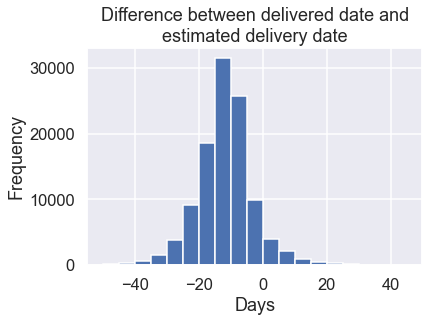

In [222]:
df_sales.delivery_days_diff.plot.hist(bins=np.arange(-50,50,5))
plt.title('Difference between delivered date and\nestimated delivery date')
plt.xlabel('Days')
plt.savefig('perbedaan hari pengiriman dan estimasi.png', bbox_inches='tight')
plt.show()

In [38]:
df_sales['sla'] = np.where(df_sales.delivery_days_diff>0,'late','on-time')

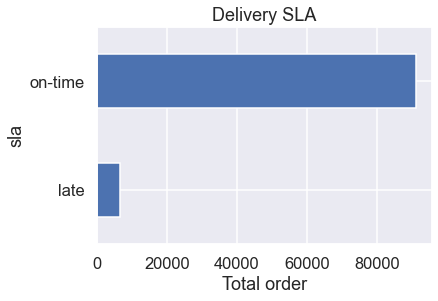

In [223]:
df_sales.groupby(['sla'])['order_id'].nunique().plot.barh()
plt.title('Delivery SLA')
plt.xlabel('Total order')
plt.savefig('sla pengiriman.png', bbox_inches='tight')
plt.show()

Secara keseluruhan, lebih dari 90% pengiriman mencapai SLA. Namun kita akan melihat SLA pengiriman tiap bulannya untuk menangkap tren pengiriman sepanjang Sep 2016 - Sep 2018.

In [54]:
round(df_sales[df_sales.sla=='on-time'].order_id.nunique() / df_sales.order_id.nunique() * 100, 2)

93.3

In [40]:
df_sales[df_sales.sla=='late'].groupby(['shipping_route_state'])['order_id'].nunique()

shipping_route_state
AM-AL       1
BA-AC       1
BA-BA       5
BA-CE       2
BA-MA       1
         ... 
SP-RS     238
SP-SC     222
SP-SE      34
SP-SP    1428
SP-TO      21
Name: order_id, Length: 212, dtype: int64

In [89]:
df_late_order = pd.merge(df_sales.resample('MS', on='order_purchase_timestamp')['order_id'].nunique().to_frame().reset_index().rename(columns={'order_id':'total_order'}),
         df_sales[df_sales.sla=='late'].resample('MS', on='order_purchase_timestamp')['order_id'].nunique().to_frame().reset_index().rename(columns={'order_id':'late_order'}),
         on='order_purchase_timestamp')
df_late_order['late_pct'] = round(df_late_order.late_order / df_late_order.total_order * 100, 2)

In [90]:
df_late_order

,order_purchase_timestamp,total_order,late_order,late_pct
0,2016-09-01,2,1,50.00
1,2016-10-01,272,2,0.74
2,2016-11-01,0,0,NaN
3,2016-12-01,1,0,0.00
4,2017-01-01,766,22,2.87
5,2017-02-01,1674,49,2.93
6,2017-03-01,2591,116,4.48
7,2017-04-01,2352,151,6.42
8,2017-05-01,3601,106,2.94
9,2017-06-01,3182,95,2.99


Pengiriman mengalami puncak keterlambatan paling tinggi untuk order di bulan Maret 2018 yaitu sebanyak 18.61% total order. 

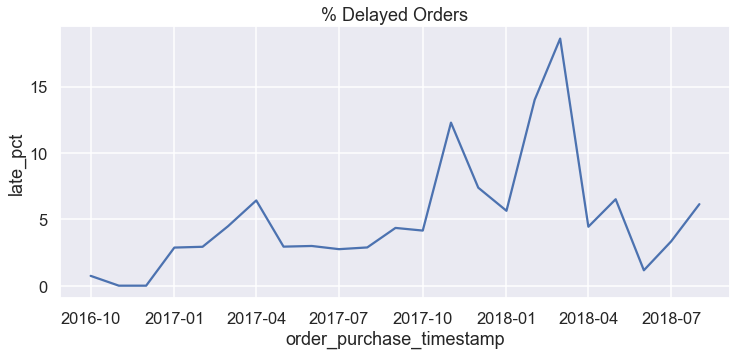

In [226]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_late_order[df_late_order.order_purchase_timestamp>'2016-09-30'].fillna(0), x='order_purchase_timestamp', y='late_pct')
plt.title('% Delayed Orders')
plt.savefig('delayed order pct.png', bbox_inches='tight')
plt.show()

In [126]:
df_sales[(df_sales.order_purchase_timestamp>='2017-09-01') & (df_sales.order_purchase_timestamp<='2018-04-01')].groupby(['shipping_route_state_name'])['order_id'].nunique().sort_values().tail(10).index

Index(['São Paulo-Goiás', 'Minas Gerais-São Paulo', 'São Paulo-Bahia',
       'São Paulo-Santa Catarina', 'São Paulo-Paraná', 'Paraná-São Paulo',
       'São Paulo-Rio Grande do Sul', 'São Paulo-Minas Gerais',
       'São Paulo-Rio de Janeiro', 'São Paulo-São Paulo'],
      dtype='object', name='shipping_route_state_name')

In [144]:
df_late_order_route = pd.merge(df_sales[df_sales.order_purchase_timestamp.dt.to_period('M').dt.to_timestamp()=='2018-03-01'].reset_index(drop=True).groupby('shipping_route_state_name').resample('MS', on='order_purchase_timestamp')['order_id'].nunique().to_frame().reset_index().rename(columns={'order_id':'total_order'}),
         df_sales[(df_sales.sla=='late') & (df_sales.order_purchase_timestamp.dt.to_period('M').dt.to_timestamp()=='2018-03-01')].reset_index(drop=True).groupby('shipping_route_state_name').resample('MS', on='order_purchase_timestamp')['order_id'].nunique().to_frame().reset_index().rename(columns={'order_id':'late_order'}),
         on=['order_purchase_timestamp','shipping_route_state_name'],
         how='left')
df_late_order_route['late_pct'] = round(df_late_order_route.late_order / df_late_order_route.total_order * 100, 2)
df_late_order_route

,shipping_route_state_name,order_purchase_timestamp,total_order,late_order,late_pct
0,Bahia-Espírito Santo,2018-03-01,1,NaN,NaN
1,Bahia-Paraná,2018-03-01,1,NaN,NaN
2,Bahia-Pernambuco,2018-03-01,1,NaN,NaN
3,Bahia-Rio de Janeiro,2018-03-01,3,1.0,33.33
4,Bahia-Santa Catarina,2018-03-01,1,1.0,100.00
...,...,...,...,...,...
211,São Paulo-Roraima,2018-03-01,5,NaN,NaN
212,São Paulo-Santa Catarina,2018-03-01,173,39.0,22.54
213,São Paulo-Sergipe,2018-03-01,15,9.0,60.00
214,São Paulo-São Paulo,2018-03-01,2338,204.0,8.73


Pengiriman order melebihi SLA terbanyak di bulan Maret 2018 terdapat di rute `São Paulo-Rio de Janeiro`, yaitu 248 pengiriman telat atau 39.81% dari total pengiriman bulan tersebut. Rute ini adalah salah satu dari 3 rute yang paling banyak dilalui. 

In [166]:
df_late_order_route.sort_values('late_order', ascending=False).head(10)

,shipping_route_state_name,order_purchase_timestamp,total_order,late_order,late_pct
209,São Paulo-Rio de Janeiro,2018-03-01,623,248.0,39.81
214,São Paulo-São Paulo,2018-03-01,2338,204.0,8.73
201,São Paulo-Minas Gerais,2018-03-01,601,143.0,23.79
193,São Paulo-Bahia,2018-03-01,189,59.0,31.22
208,São Paulo-Rio Grande do Sul,2018-03-01,277,57.0,20.58
196,São Paulo-Espírito Santo,2018-03-01,104,51.0,49.04
194,São Paulo-Ceará,2018-03-01,81,41.0,50.62
212,São Paulo-Santa Catarina,2018-03-01,173,39.0,22.54
168,Rio de Janeiro-São Paulo,2018-03-01,86,36.0,41.86
202,São Paulo-Paraná,2018-03-01,250,36.0,14.40


c:\Users\azuka\Anaconda3\envs\base-analysis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


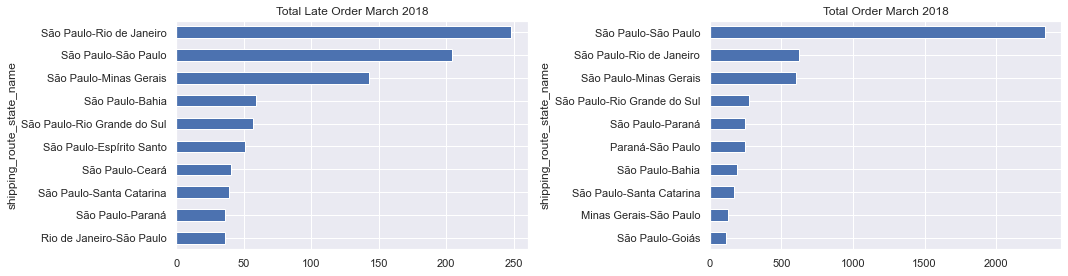

In [164]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
df_late_order_route.groupby(['shipping_route_state_name'])['late_order'].sum().sort_values().tail(10).plot.barh(ax=ax[0])
ax[0].set_title('Total Late Order March 2018')
df_late_order_route.groupby(['shipping_route_state_name'])['total_order'].sum().sort_values().tail(10).plot.barh(ax=ax[1])
ax[1].set_title('Total Order March 2018')
plt.tight_layout()
plt.show()